In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Load Data

In [91]:
data_file = os.path.join('D:', os.path.sep, 'prg', 'Datasets', 'general', 'pima-indians-diabetes.csv')
data_file

'D:\\prg\\Datasets\\general\\pima-indians-diabetes.csv'

In [92]:
df = pd.read_csv(data_file)

In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# sns.pairplot(df)

In [89]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

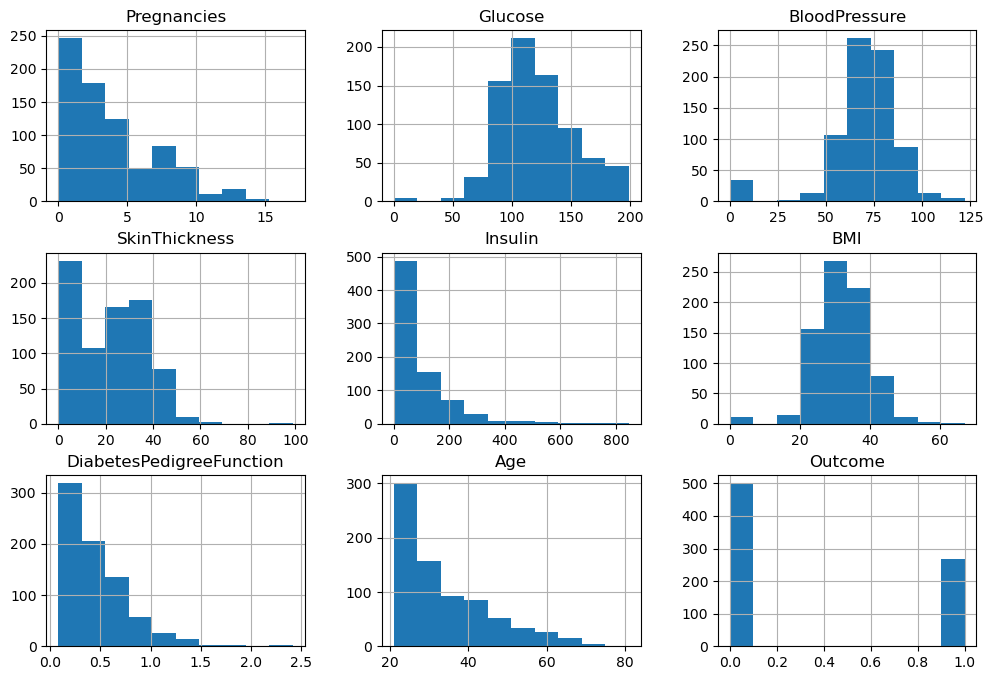

In [8]:
df.hist(figsize=(12,8))

**NOTE: There rae some fault values in data**
* Some rows with a value of 0 were observed for insulin. This is a trap you may fall into because there is at least 25 mIU/L of insulin in the blood of a living person.

* SkinThickness Can not be 0

* Blood pressure of live person can not be 0

**It is obvious at a glance, that the data collector, puts 0 instead null values. So the data columns are not reliable and should be re-examined**

## Preprocess with pandas

----------------
**Determie how many "zero" exists in each data column**

In [81]:
len(df[df['Insulin'] == 0])

#  Same as:

df[df['Insulin'] == 0].any(axis=1).sum() # 374

374

In [82]:
for col in df.columns:
    zero_sum = df[df[col] == 0].any(axis=1).sum() # 374
    print(f'{zero_sum}  \t "ZERO" exist in {col}')
    # df[df['Insulin'] == 0].any(axis=1).sum() # 374

111  	 "ZERO" exist in Pregnancies
5  	 "ZERO" exist in Glucose
35  	 "ZERO" exist in BloodPressure
227  	 "ZERO" exist in SkinThickness
374  	 "ZERO" exist in Insulin
11  	 "ZERO" exist in BMI
0  	 "ZERO" exist in DiabetesPedigreeFunction
0  	 "ZERO" exist in Age
500  	 "ZERO" exist in Outcome


-----------
**Now lets handle them:**

In [83]:
skin_mean = df[df['SkinThickness'] != 0]['SkinThickness'].mean()
skin_mean

29.153419593345657

In [86]:
len(df[df['SkinThickness'] == 0])

0

In [85]:
df.replace({'SkinThickness':0}, skin_mean, inplace=True)

In [90]:
Glucose_mean = df[df['Glucose'] != 0]['Glucose'].mean()
Glucose_mean
df.replace({'Glucose':0}, Glucose_mean, inplace=True)

## KNN Imputer
# {Explain it here...!!!}
**Find nearest neighbor with other features based on euclidian distance**<br/>
**Data must be scaled (normal) before any operation so knn imputer make a min max norm first**

euclidian distance Formula == ???

In [95]:
df = pd.read_csv(data_file)

In [96]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
df.replace({'Glucose':0, 'BloodPressure':0, 'SkinThickness':0, 'Insulin':0, 'BMI':0}, np.nan, inplace=True)

In [98]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [99]:
from sklearn.impute import KNNImputer

In [100]:
# K=3
imputer = KNNImputer(n_neighbors=3)

In [108]:
# Label must be detache from data to process
df_proc = imputer.fit_transform(df.drop('Outcome', axis=1))

In [109]:
df_proc[0]

array([  6.        , 148.        ,  72.        ,  35.        ,
       125.33333333,  33.6       ,   0.627     ,  50.        ])

In [111]:
new_patient = [[1, 86, 78, 26, np.nan, 30, 0.385, 20]]

In [112]:
imputer.transform(new_patient)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


array([[ 1.   , 86.   , 78.   , 26.   , 36.   , 30.   ,  0.385, 20.   ]])